In [69]:
import cv2 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from ipywidgets import *
import math
from IPython.display import display





%matplotlib inline
pdir = 'C:\\Users\Ian\\Documents\\School\\IMPmodual2\\assets\\'
im1 = cv2.imread(pdir + 'sunset.jpg' )
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
cave = cv2.imread(pdir + 'cave.jpg' )
forest = cv2.imread(pdir + 'forest.jpg' )
blackdog = cv2.imread(pdir + 'blackdog.jpg' )
beach = cv2.imread(pdir + 'beach.jpg' )
groundclouds = cv2.imread(pdir + 'groundclouds.jpg' )
skyclouds = cv2.imread(pdir + 'skyclouds.jpg' )
moon = cv2.imread(pdir + 'moon.jpg' )
images = [im1, cave, forest, blackdog, beach, groundclouds, skyclouds, moon]

In [2]:
def gamcor(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

def imshow(img):
    if img.ndim>2:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.show()

def vgimshow(x, img):
    imshow(gamcor(img, x))
    
def vgvimshow(x, img):
    imshow(gamcor(images[img], x))
    

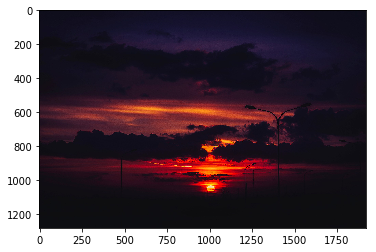

In [3]:


imshow(im1)


In [4]:
interact(vgimshow, x=(0.01,3,0.01), img=fixed(im1))

A Jupyter Widget

<function __main__.vgimshow>

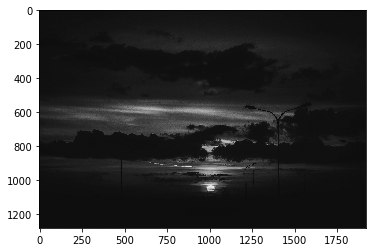

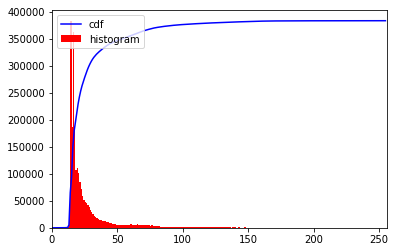

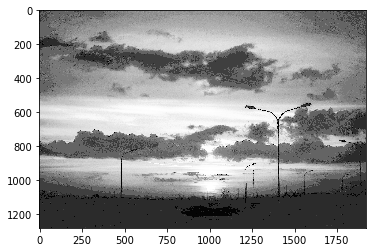

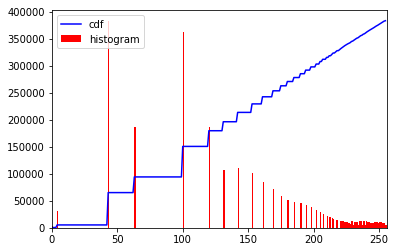

In [11]:

imshow(im2)

hist,bins = np.histogram(im2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(im2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

im3 = cv2.equalizeHist(im2)
imshow(im3)

hist,bins = np.histogram(im3.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(im3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()





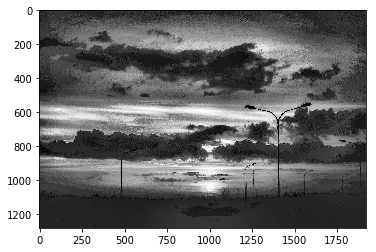

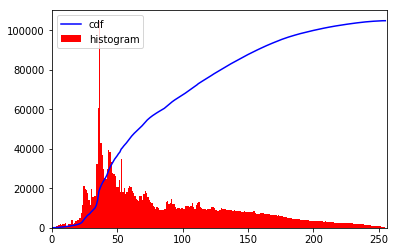

In [81]:
clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(8,8))
im4 = clahe.apply(im2)

imshow(im4)

hist,bins = np.histogram(im4.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(im4.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



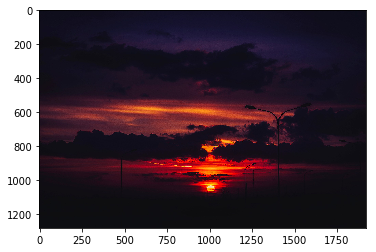

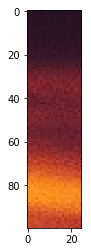

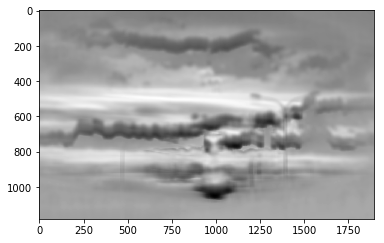

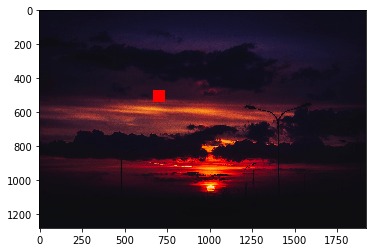

In [80]:
x = cv2.matchTemplate(im1,im1[500:600,700:725,:],method=3)
imshow(im1)
imshow(im1[500:600,700:725,:])
imshow(x)

minv, maxv, minl, maxl, = cv2.minMaxLoc(x)
   
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
rect = patches.Rectangle((maxl[0]-20,maxl[1]-20),40,40,linewidth = 5, edgecolor = 'r', facecolor = 'r')
ax.add_patch(rect)
plt.show()

In [78]:
lastt = 0
def seldim(vd,hd,img):
    print(vd)
    imshow(img[vd[0]:vd[1],hd[0]:hd[1],:])
    corrd = cv2.matchTemplate(img,img[vd[0]:vd[1],hd[0]:hd[1],:],method=3)
    imshow(corrd)

    minv, maxv, minl, maxl, = cv2.minMaxLoc(corrd)
    print(str(maxl[0])+' '+str(maxl[1]))
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    rect = patches.Rectangle((maxl[0]-20,maxl[1]-20),40,40,linewidth = 5, edgecolor = 'r', facecolor = 'r')
    ax.add_patch(rect)
    plt.show()
    
def seltask(task,img):
    lastt = task;
    img = images[img]
    
    if task == 0:
        imshow(img)
        interact(vgimshow, x=(0.01,3,0.01), img=fixed(img))
   
    if task == 1:
        imshow(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imshow(img)
        hist,bins = np.histogram(img.flatten(),256,[0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max()/ cdf.max()
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()

        img2 = cv2.equalizeHist(img)
        imshow(img2)

        hist,bins = np.histogram(img2.flatten(),256,[0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max()/ cdf.max()
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img2.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
   
    if task == 2:
        imshow(img)
        interact_manual(seldim, vd = widgets.SelectionRangeSlider(
            options=list(range(np.size(z, 0))),
            index=(0,np.size(z, 0)-1),
            description = 'Vertical Selection',
            disabled=False
            ), hd = widgets.SelectionRangeSlider(
            options=list(range(np.size(z, 1))),
            index=(0,np.size(z, 1)-1),
            description = 'Horizontal Selection',
            disabled=False
            ), img = fixed(img))
    
    
def selim(image):
     interact(seltask, task = {'Gamma Corectrion' : 0, 'Histogram':1, 'Correlation' : 2}, img = fixed(image))
 

interact(selim, image={'dusk': 0, 'cave' : 1, 'forest' : 2, 'black dog' : 3,'beach' : 4, 'clouds from groud' : 5, 'clouds in sky': 6, 'moon' : 7})

A Jupyter Widget

<function __main__.selim>

In [12]:
print('image credits :')
print('dusk - https://pixabay.com/en/sunset-dusk-sky-clouds-sun-2154213/ ')
print('cave - https://pixabay.com/en/cave-light-person-rocky-silhouette-1835825/')
print('forest - https://pixabay.com/en/winter-sun-sun-so-sunbeam-sunset-1547273/')
print('black dog - https://pixabay.com/en/labrador-hybrid-mix-dog-animal-2184709/')
print('beach - https://pixabay.com/en/beach-crowd-holiday-202548/ ')
print('cloudsg - https://pixabay.com/en/beach-crowd-holiday-202548/ ')
print('cloudss - https://pixabay.com/en/storm-hunting-meteorology-3199062/ ')
print('moon - https://pixabay.com/en/moon-full-moon-luna-celestial-full-1973516/')

image credits :
dusk - https://pixabay.com/en/sunset-dusk-sky-clouds-sun-2154213/ 
cave - https://pixabay.com/en/cave-light-person-rocky-silhouette-1835825/
forest - https://pixabay.com/en/winter-sun-sun-so-sunbeam-sunset-1547273/
black dog - https://pixabay.com/en/labrador-hybrid-mix-dog-animal-2184709/
beach - https://pixabay.com/en/beach-crowd-holiday-202548/ 
cloudsg - https://pixabay.com/en/beach-crowd-holiday-202548/ 
cloudss - https://pixabay.com/en/storm-hunting-meteorology-3199062/ 
moon - https://pixabay.com/en/moon-full-moon-luna-celestial-full-1973516/
